[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rehma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy Score: 0.4584

Classification Report:
               precision    recall  f1-score   support

           1       0.54      0.70      0.61      1021
           2       0.38      0.28      0.32      1000
           3       0.38      0.31      0.34       985
           4       0.39      0.37      0.38       989
           5       0.52      0.64      0.58      1005

    accuracy                           0.46      5000
   macro avg       0.44      0.46      0.44      5000
weighted avg       0.44      0.46      0.44      5000



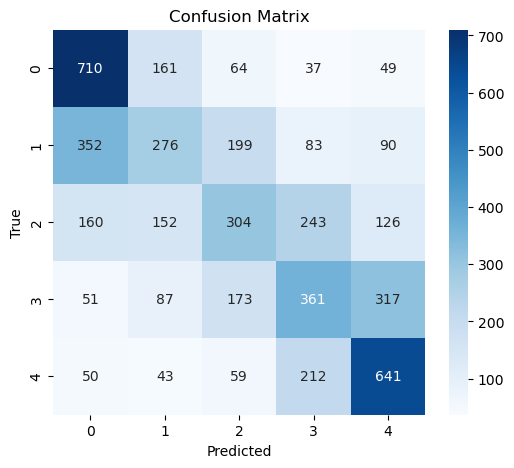

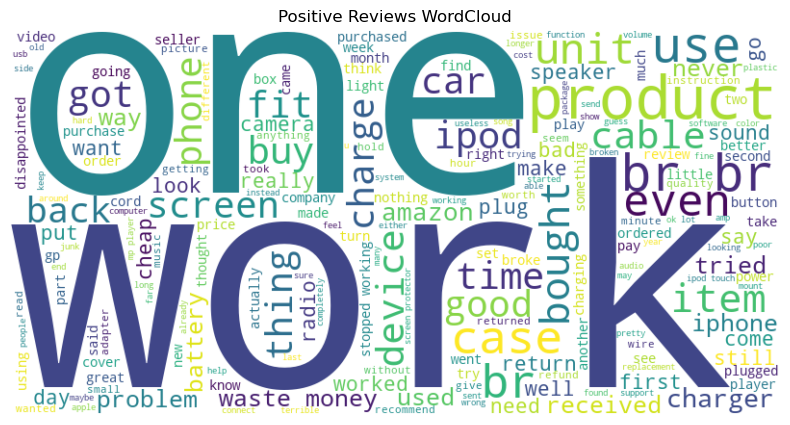

In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Download NLTK Resources
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Step 3: Load Dataset
data = pd.read_csv('Amazon-Product-Reviews-Sentiment-Analysis-in-Python-Dataset.csv')

# Step 4: Data Cleaning Function
def clean_text(text):
    text = str(text).lower()  # Sabko chhoti letters mein
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Sirf alphabets rakhna, numbers aur symbols hataana
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Apply cleaning
data['Clean_Review'] = data['Review'].apply(clean_text)

# Step 5: Feature Extraction
tfidf = TfidfVectorizer(max_features=7000)  # Zyada features liye taake model zyada seekhe
X = tfidf.fit_transform(data['Clean_Review']).toarray()
y = data['Sentiment']

# Step 6: Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Model Training
model = RandomForestClassifier(n_estimators=150, random_state=42)  # Random Forest use kiya zyada strong
model.fit(X_train, y_train)

# Step 8: Model Prediction
y_pred = model.predict(X_test)

# Step 9: Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visual
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Step 10: WordClouds
# Positive Reviews WordCloud
positive_reviews = ' '.join(data[data['Sentiment'] == 1]['Clean_Review'])
if positive_reviews:
    wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_pos, interpolation='bilinear')
    plt.axis('off')
    plt.title('Positive Reviews WordCloud')
    plt.show()

# Negative Reviews WordCloud
negative_reviews = ' '.join(data[data['Sentiment'] == 0]['Clean_Review'])
if negative_reviews:
    wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_reviews)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_neg, interpolation='bilinear')
    plt.axis('off')
    plt.title('Negative Reviews WordCloud')
    plt.show()
